In [13]:
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt 
import numpy as np
from PIL import Image
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model = YOLO('/Users/mahikanair/.pyenv/runs/classify/train3/weights/best.pt')

In [14]:
directory = '/Users/mahikanair/Downloads/MudrasCapstone.jpegfiles_2/Captured_Hands_Cropped_More'

y_test = []

for folder in os.listdir(directory):
    path = os.path.join(directory, folder)
    
    if os.path.isdir(path):
        for image in os.listdir(path):
            if image.lower().endswith(('.png', '.jpg', '.jpeg')):
                y_test.append(int(folder)) #find out label for each image this way


In [15]:
y_pred = []

for folder in os.listdir(directory):
    path = os.path.join(directory, folder)
    
    if os.path.isdir(path):
        for image in os.listdir(path):
            if image.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(path, image)
                results = model(image_path)
                prediction = results[0].probs.top1
                y_pred.append(prediction) #append prediction


image 1/1 /Users/mahikanair/Downloads/MudrasCapstone.jpegfiles_2/Captured_Hands_Cropped_More/20/6subject11.jpg: 64x64 20 0.91, 1 0.04, 22 0.03, 7 0.01, 10 0.00, 2.3ms
Speed: 1.6ms preprocess, 2.3ms inference, 0.0ms postprocess per image at shape (1, 3, 64, 64)

image 1/1 /Users/mahikanair/Downloads/MudrasCapstone.jpegfiles_2/Captured_Hands_Cropped_More/20/1subject11.jpg: 64x64 20 0.87, 22 0.05, 1 0.03, 23 0.01, 6 0.01, 1.7ms
Speed: 0.9ms preprocess, 1.7ms inference, 0.0ms postprocess per image at shape (1, 3, 64, 64)

image 1/1 /Users/mahikanair/Downloads/MudrasCapstone.jpegfiles_2/Captured_Hands_Cropped_More/20/15subject12.jpg: 64x64 20 0.64, 3 0.22, 28 0.13, 1 0.01, 6 0.00, 2.4ms
Speed: 0.6ms preprocess, 2.4ms inference, 0.0ms postprocess per image at shape (1, 3, 64, 64)

image 1/1 /Users/mahikanair/Downloads/MudrasCapstone.jpegfiles_2/Captured_Hands_Cropped_More/20/12subject12.jpg: 64x64 20 0.72, 3 0.23, 28 0.04, 1 0.00, 6 0.00, 2.4ms
Speed: 0.5ms preprocess, 2.4ms inference, 0.0m

In [16]:
labels_dict = {0: 0, 1: 1, 12: 2, 23: 3, 24: 4, 25: 5, 26: 6, 27:7, 28:8, 29:9, 2: 10, 3:11, 4:12, 5:13, 6:14, 7:15, 8:16, 9:17, 10:18, 11:19, 13:20, 14:21, 15:22, 16:23, 17:24, 18:25, 19:26, 20:27, 21:28, 22:29}
y_pred = [labels_dict[prediction] for prediction in y_pred] #y_pred values according to the mapping

In [17]:
y_pred = np.array(y_pred)
y_test = np.array(y_test)

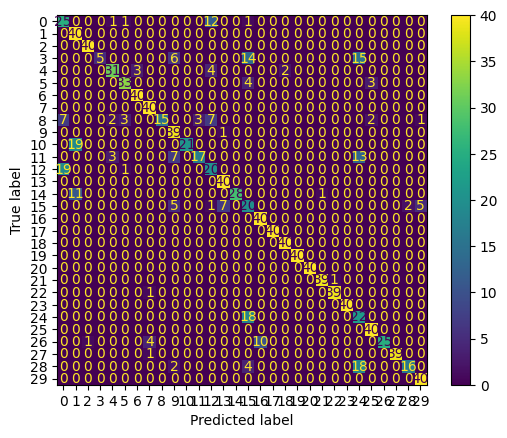

In [18]:
#creatnig confusion matrix 
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.62      0.55        40
           1       0.57      1.00      0.73        40
           2       0.98      1.00      0.99        40
           3       1.00      0.12      0.22        40
           4       0.84      0.78      0.81        40
           5       0.87      0.82      0.85        40
           6       0.93      1.00      0.96        40
           7       0.87      1.00      0.93        40
           8       1.00      0.38      0.55        40
           9       0.66      0.97      0.79        40
          10       1.00      0.53      0.69        40
          11       0.85      0.42      0.57        40
          12       0.45      0.50      0.48        40
          13       0.83      1.00      0.91        40
          14       1.00      0.70      0.82        40
          15       0.33      0.50      0.40        40
          16       0.80      1.00      0.8